In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_excel(io.BytesIO(uploaded['Data.xlsx']))

Saving Data.xlsx to Data.xlsx


## About the Dataset:


The data is related to direct marketing campaign  of a Portugese banking institution. The classification goal is to predict if the client will subscribe to a term deposit. 
Often, more than one call was made to the same customer , in order to assess if the product (bank term deposit) would be yes or no.

In [ ]:
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Data Cleaning:

In [ ]:
df.columns=df.iloc[1]  #changing the head of the table       

In [ ]:
df.drop([0,1],inplace=True,axis=0) #dropping the rows as they are of no use for us.

In [ ]:
df.reset_index(drop=True,inplace=True) #resetting the index of the table

In [ ]:
df.insert(loc=5,column="job",value=(df.jobedu.str.split(",",expand=True))[0])  #splitting a column into two and adding them to the table
df.insert(loc=6,column="edu",value=(df.jobedu.str.split(",",expand=True))[1])
df.drop(["jobedu"],inplace=True,axis=1)

In [ ]:
df.insert(loc=13,column="Month",value=(df.month.str.split(",",expand=True))[0])  #splitting a column into two and adding them to the table
df.insert(loc=14,column="year",value=(df.month.str.split(",",expand=True))[1])
df.drop(["month"],inplace=True,axis=1)

In [ ]:
df["duration"]=df["duration"].apply(pd.Timedelta).dt.total_seconds().astype(int)

In [ ]:
df.isnull().sum()/df.shape[0]

1
customerid    0.000000
age           0.000442
salary        0.000000
balance       0.000000
marital       0.000000
job           0.000000
edu           0.000000
targeted      0.000000
default       0.000000
housing       0.000000
loan          0.000000
contact       0.000000
day           0.000000
Month         0.001106
year          0.001106
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome      0.000000
response      0.000664
dtype: float64

In [ ]:
df["age"]=df["age"].fillna(df["age"].mode()[0])  #filling the null values in age column with mode

In [ ]:
df["age"].isnull().sum()

0

In [ ]:
import numpy as np
df["salary"]=df["salary"].replace("?",np.nan) #replacing the ? values with NAN and filling null vales
df["salary"]=df["salary"].fillna(df["salary"].mode()[0])

In [ ]:
df["salary"].isnull().sum()

0

In [ ]:
df["Month"]=df["Month"].fillna(df["Month"].mode()[0])

In [ ]:
df["Month"].isnull().sum()

0

In [ ]:
df["year"]=df["year"].fillna(df["year"].mode()[0])


In [ ]:
df["day"]=df["day"].fillna(df["day"].mode()[0])

In [ ]:
df["response"]=df["response"].fillna(df["response"].mode()[0])

In [ ]:
df["balance"]=df["balance"].astype(int)

In [ ]:
df.isnull().sum()/df.shape[0]

1
customerid    0.0
age           0.0
salary        0.0
balance       0.0
marital       0.0
job           0.0
edu           0.0
targeted      0.0
default       0.0
housing       0.0
loan          0.0
contact       0.0
day           0.0
Month         0.0
year          0.0
duration      0.0
campaign      0.0
pdays         0.0
previous      0.0
poutcome      0.0
response      0.0
dtype: float64

### Data Manipulation:

In [ ]:
import datetime
df["month_"]=df["Month"]
for ind in df.index:
  if df["Month"][ind]=='jan':
    df["month_"][ind]=1

  elif df["Month"][ind]=='feb':
    df["month_"][ind]=2
    
  elif df["Month"][ind]=='mar':
    df["month_"][ind]=3
  
  elif df["Month"][ind]=='apr':
    df["month_"][ind]=4
  
  elif df["Month"][ind]=='may':
    df["month_"][ind]=5

  elif df["Month"][ind]=='jun':
    df["month_"][ind]=6
  
  elif df["Month"][ind]=='jul':
    df["month_"][ind]=7

  elif df["Month"][ind]=='aug':
    df["month_"][ind]=8

  elif df["Month"][ind]=='sep':
    df["month_"][ind]=9

  elif df["Month"][ind]=='oct':
    df["month_"][ind]=10

  elif df["Month"][ind]=='nov':
    df["month_"][ind]=11

  elif df["Month"][ind]=='dec':
    df["month_"][ind]=12
  
     

<ipython-input-23-a367dc176433>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month_"][ind]=5
<ipython-input-23-a367dc176433>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month_"][ind]=6
<ipython-input-23-a367dc176433>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month_"][ind]=7
<ipython-input-23-a367dc176433>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

In [ ]:
import datetime
df["date"]=(df["year"]).astype(str)+"-"+(df["month_"]).astype(str)+"-"+(df["day"]).astype(str)

In [ ]:
dfx=pd.to_datetime(df["date"])

In [ ]:
df.insert(loc=12,column="Dayofweek",value=dfx.dt.day_name())
df.drop(["day"],inplace=True,axis=1)

In [ ]:
df.head()

1,customerid,age,salary,balance,marital,job,edu,targeted,default,housing,...,Month,year,duration,campaign,pdays,previous,poutcome,response,month_,date
0,1,58,100000.0,2143,married,management,tertiary,yes,no,yes,...,may,2017,261,1,-1,0,unknown,no,5,2017-5-5
1,2,44,60000.0,29,single,technician,secondary,yes,no,yes,...,may,2017,151,1,-1,0,unknown,no,5,2017-5-5
2,3,33,120000.0,2,married,entrepreneur,secondary,yes,no,yes,...,may,2017,76,1,-1,0,unknown,no,5,2017-5-5
3,4,47,20000.0,1506,married,blue-collar,unknown,no,no,yes,...,may,2017,92,1,-1,0,unknown,no,5,2017-5-5
4,5,33,0.0,1,single,unknown,unknown,no,no,no,...,may,2017,198,1,-1,0,unknown,no,5,2017-5-5


In [ ]:
df.describe()

1,age,salary,balance,duration
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.931698,57033.598018,1362.272058,257.934043
std,10.618511,32045.499603,3044.765829,257.527795
min,18.000000,0.000000,-8019.000000,0.000000
25%,33.000000,20000.000000,72.000000,103.000000
50%,39.000000,60000.000000,448.000000,180.000000
75%,48.000000,70000.000000,1428.000000,319.000000
max,95.000000,120000.000000,102127.000000,4918.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  object 
 1   age         45211 non-null  int64  
 2   salary      45211 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   job         45211 non-null  object 
 6   edu         45211 non-null  object 
 7   targeted    45211 non-null  object 
 8   default     45211 non-null  object 
 9   housing     45211 non-null  object 
 10  loan        45211 non-null  object 
 11  contact     45211 non-null  object 
 12  Dayofweek   45211 non-null  object 
 13  Month       45211 non-null  object 
 14  year        45211 non-null  object 
 15  duration    45211 non-null  int64  
 16  campaign    45211 non-null  object 
 17  pdays       45211 non-null  object 
 18  previous    45211 non-null  object 
 19  poutcome    45211 non-nul

In [ ]:
df["age"] = df["age"].astype(float)


In [ ]:
df["balance"] = df["balance"].astype(float)


In [ ]:
df["duration"] = df["duration"].astype(float)


####Handling the outliers:

#####Boxplot for Age:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

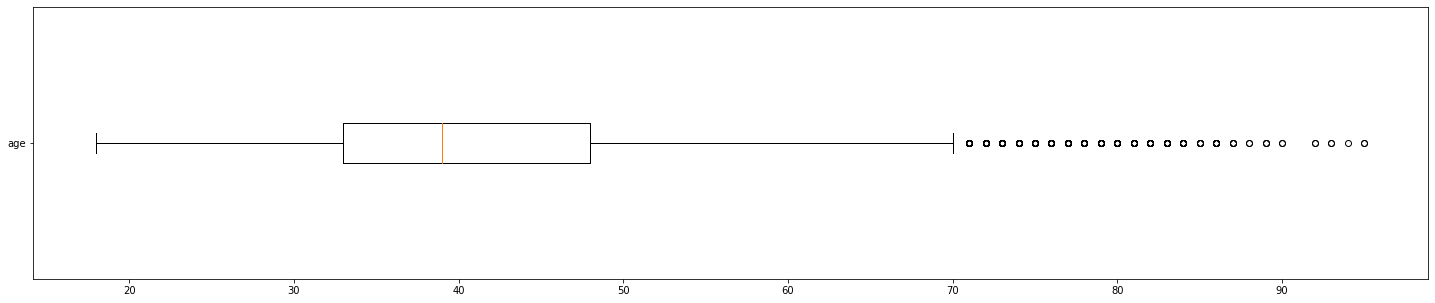

In [ ]:
plt.figure(figsize=(25,5))
plt.boxplot(df["age"],labels=["age"],vert=0)
plt.show()

Observations:

There are outliers are present above the age of 70 years.

Ohter graphs for predicting the outliers:

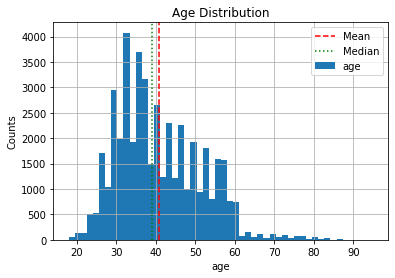

In [ ]:
df['age'].hist(bins=50, label='age')

plt.axvline(np.mean(df['age']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['age']), ls=':', c='g', label="Median")

plt.xlabel("age")
plt.ylabel("Counts")

plt.title("Age Distribution")

plt.legend()

Text(0.5, 1.0, 'Sales Price Distribution')

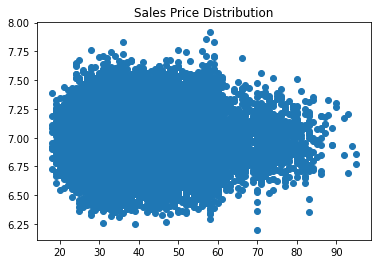

In [ ]:
plt.scatter(df['age'], np.random.normal(7, 0.2, size=df.shape[0]))

plt.title("Sales Price Distribution")

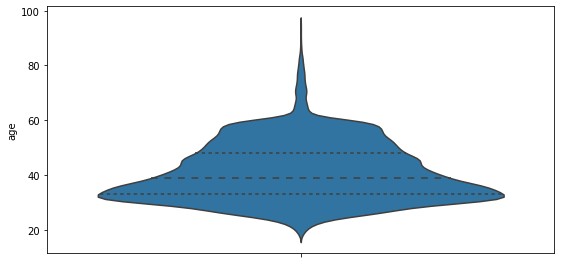

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 4)

sns.violinplot(y="age", data=df, inner="quartile")

###Finding outliers with code:

In [ ]:
def find_outliers(data, col, verbose=False):

  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  IQR = q3 - q1
  lower_boundary = q1 - (1.5*IQR)
  higher_boundary = q3 + (1.5*IQR)
  outliers_df = data[(data[col]<lower_boundary) | (data[col]>higher_boundary)]
  df_good_col = data[~((data[col]<lower_boundary) | (data[col]>higher_boundary))]
  if(verbose):
    print(lower_boundary, higher_boundary)
    display(outliers_df)
    print("Outliers Percentage ::", (len(outliers_df)/len(data)) * 100, "%")
    print(len(outliers_df))
  return outliers_df, df_good_col

In [ ]:
outliers_age, df_good_age = find_outliers(df, "age", verbose=True)

10.5 70.5


1,customerid,age,salary,balance,marital,job,edu,targeted,default,housing,...,Month,year,duration,campaign,pdays,previous,poutcome,response,month_,date
29158,29159,83.0,55000.0,425.0,married,retired,primary,yes,no,no,...,feb,2017,912.0,1,-1,0,unknown,no,2,2017-2-2
29261,29262,75.0,55000.0,46.0,divorced,retired,primary,yes,no,no,...,feb,2017,294.0,1,-1,0,unknown,no,2,2017-2-2
29263,29264,75.0,55000.0,3324.0,married,retired,primary,yes,no,no,...,feb,2017,148.0,1,-1,0,unknown,no,2,2017-2-2
29322,29323,83.0,55000.0,6236.0,married,retired,tertiary,yes,no,no,...,feb,2017,283.0,2,-1,0,unknown,no,2,2017-2-2
29865,29866,75.0,55000.0,3881.0,divorced,retired,primary,yes,no,yes,...,feb,2017,136.0,3,-1,0,unknown,yes,2,2017-2-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45163,45164,71.0,55000.0,2064.0,married,retired,secondary,yes,no,no,...,nov,2017,379.0,2,92,3,failure,no,11,2017-11-9
45191,45192,75.0,55000.0,3810.0,divorced,retired,tertiary,no,no,yes,...,nov,2017,262.0,1,183,1,failure,yes,11,2017-11-16
45204,45205,73.0,55000.0,2850.0,married,retired,secondary,yes,no,no,...,nov,2017,300.0,1,40,8,failure,yes,11,2017-11-17
45207,45208,71.0,55000.0,1729.0,divorced,retired,primary,yes,no,no,...,nov,2017,456.0,2,-1,0,unknown,yes,11,2017-11-17


Outliers Percentage :: 1.0771714848156422 %
487


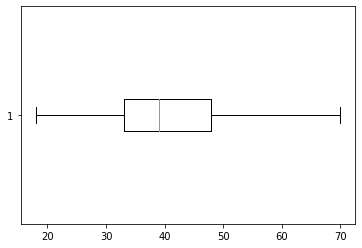

In [ ]:
plt.boxplot(df_good_age["age"], vert=0)

plt.show()

Boxplot for Balance:

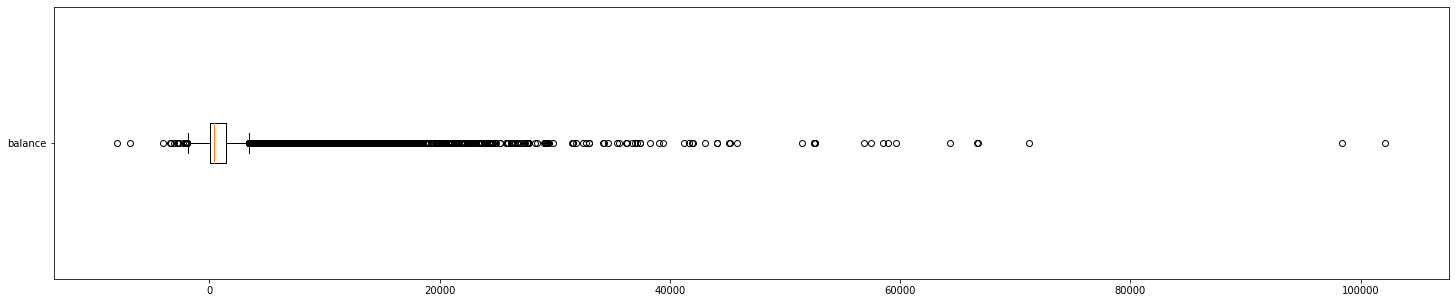

In [ ]:
plt.figure(figsize=(25,5))

plt.boxplot(df_good_age["balance"],labels=["balance"],vert=0) 

plt.show()

Observations:

The outliers are present from around 2700.

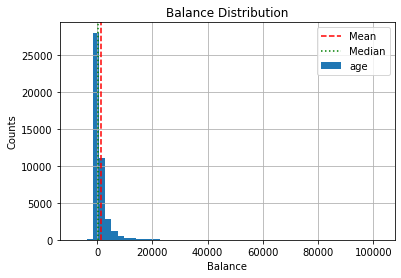

In [ ]:
df_good_age["balance"].hist(bins=50, label='age')

plt.axvline(np.mean(df_good_age["balance"]), ls='--', c='r', label="Mean")
plt.axvline(np.median(df_good_age["balance"]), ls=':', c='g', label="Median")

plt.xlabel("Balance")
plt.ylabel("Counts")

plt.title("Balance Distribution")

plt.legend()

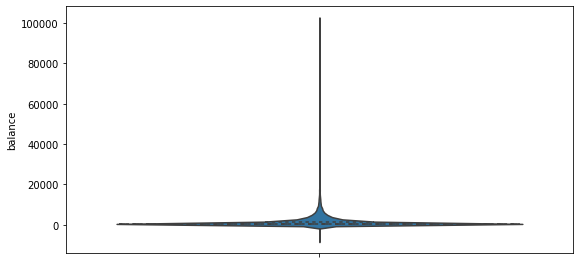

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 4)

sns.violinplot(y="balance", data=df_good_age, inner="quartile")

In [ ]:
outliers_bal, df_good_bal = find_outliers(df_good_age, "balance", verbose=True)

-1934.5 3413.5


1,customerid,age,salary,balance,marital,job,edu,targeted,default,housing,...,Month,year,duration,campaign,pdays,previous,poutcome,response,month_,date
34,35,51.0,100000.0,10635.0,married,management,tertiary,yes,no,yes,...,may,2017,336.0,1,-1,0,unknown,no,5,2017-5-5
65,66,51.0,100000.0,6530.0,married,management,tertiary,yes,no,yes,...,may,2017,91.0,1,-1,0,unknown,no,5,2017-5-5
69,70,35.0,20000.0,12223.0,single,blue-collar,secondary,yes,no,yes,...,may,2017,177.0,1,-1,0,unknown,no,5,2017-5-5
70,71,57.0,20000.0,5935.0,married,blue-collar,secondary,yes,no,yes,...,may,2017,258.0,1,-1,0,unknown,no,5,2017-5-5
186,187,40.0,70000.0,4384.0,divorced,services,unknown,no,no,yes,...,may,2017,315.0,1,-1,0,unknown,no,5,2017-5-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45156,45157,37.0,100000.0,3556.0,married,management,tertiary,yes,no,no,...,nov,2017,268.0,1,-1,0,unknown,yes,11,2017-11-9
45159,45160,60.0,70000.0,4428.0,married,services,secondary,yes,no,no,...,nov,2017,124.0,1,96,6,failure,no,11,2017-11-9
45164,45165,35.0,70000.0,4655.0,married,services,tertiary,yes,no,no,...,nov,2017,111.0,2,-1,0,unknown,no,11,2017-11-9
45181,45182,46.0,20000.0,6879.0,married,blue-collar,secondary,yes,no,no,...,nov,2017,73.0,2,118,3,failure,no,11,2017-11-15


Outliers Percentage :: 10.499955281280744 %
4696


Since the outliers percentage is 10%, we do not delete them as the values would contribute to the analysis.

Boxplot for duration:

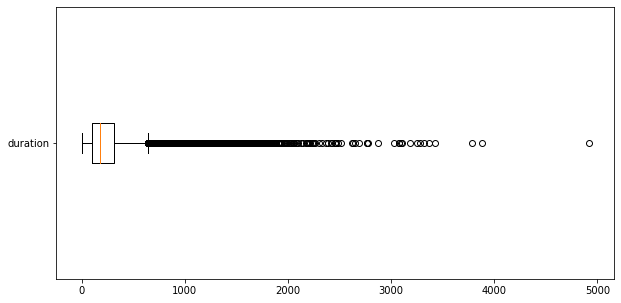

In [ ]:
plt.figure(figsize=(10,5))

plt.boxplot(df_good_age["duration"],labels=["duration"],vert=0)

plt.show()

Observations:

The outliers are present from around 650.

In [ ]:
outliers_dur, df_good_dur = find_outliers(df_good_age, "duration", verbose=True)

-219.5 640.5


1,customerid,age,salary,balance,marital,job,edu,targeted,default,housing,...,Month,year,duration,campaign,pdays,previous,poutcome,response,month_,date
37,38,53.0,60000.0,-3.0,married,technician,secondary,yes,no,no,...,may,2017,1666.0,1,-1,0,unknown,no,5,2017-5-5
43,44,54.0,55000.0,529.0,married,retired,secondary,yes,no,yes,...,may,2017,1492.0,1,-1,0,unknown,no,5,2017-5-5
53,54,42.0,50000.0,-76.0,single,admin.,secondary,yes,no,yes,...,may,2017,787.0,1,-1,0,unknown,no,5,2017-5-5
59,60,46.0,70000.0,179.0,married,services,primary,yes,no,yes,...,may,2017,1778.0,1,-1,0,unknown,no,5,2017-5-5
61,62,53.0,60000.0,989.0,divorced,technician,secondary,yes,no,yes,...,may,2017,812.0,1,-1,0,unknown,no,5,2017-5-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45085,45086,25.0,60000.0,325.0,single,technician,secondary,yes,no,no,...,oct,2017,715.0,3,-1,0,unknown,yes,10,2017-10-22
45124,45125,27.0,20000.0,232.0,single,blue-collar,primary,yes,no,yes,...,oct,2017,700.0,2,-1,0,unknown,yes,10,2017-10-26
45199,45200,34.0,20000.0,1475.0,single,blue-collar,secondary,yes,no,yes,...,nov,2017,1165.0,3,530,12,other,no,11,2017-11-16
45200,45201,38.0,60000.0,557.0,married,technician,secondary,yes,no,yes,...,nov,2017,1555.0,4,-1,0,unknown,yes,11,2017-11-16


Outliers Percentage :: 7.17064663268044 %
3207


Since the outliers percentage is 7%, we do not delete them as the values would contribute to the analysis.

#####Boxplot for Salary:

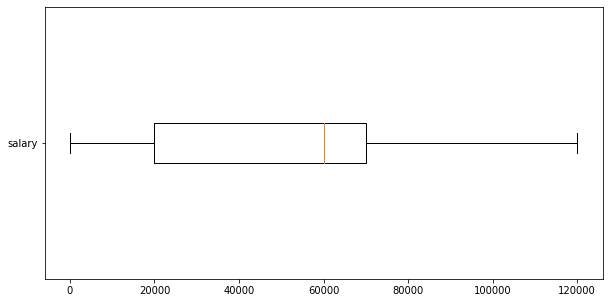

In [ ]:
plt.figure(figsize=(10,5))

plt.boxplot(df_good_age["salary"],labels=["salary"],vert=0)

plt.show()

Observations:

There are no outliers found in the graph for salary boxplot.

In [ ]:
outliers_sal, df_good_sal = find_outliers(df_good_age, "salary", verbose=True)

-55000.0 145000.0


1,customerid,age,salary,balance,marital,job,edu,targeted,default,housing,...,Month,year,duration,campaign,pdays,previous,poutcome,response,month_,date


Outliers Percentage :: 0.0 %
0


# **Visualization:**

# Univariate:

Univariate Analysis -> PDF, Histograms, Boxplots, Count plots, etc..

*   Find the outliers in each numerical column
*   Understand the probability and frequency distribution of each numerical column
*   Understand the frequency distribution of each categorical Variable/Column
*   Mention observations after each plot.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Num:

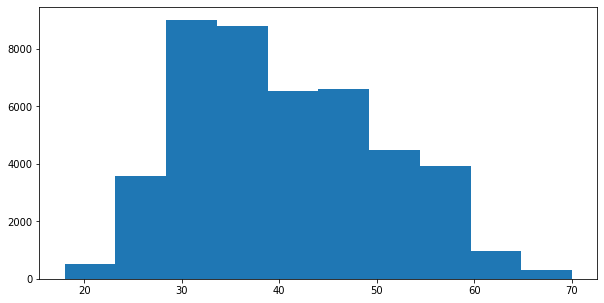

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df_good_age["age"]) 
plt.show()

Observations:

We can see the distribution of age in the population for different bins in the graph.


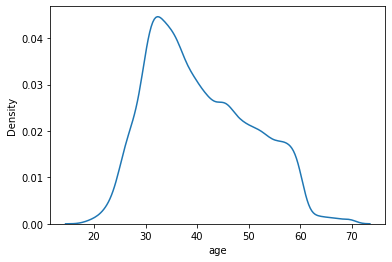

In [ ]:
sns.kdeplot(df_good_age["age"])

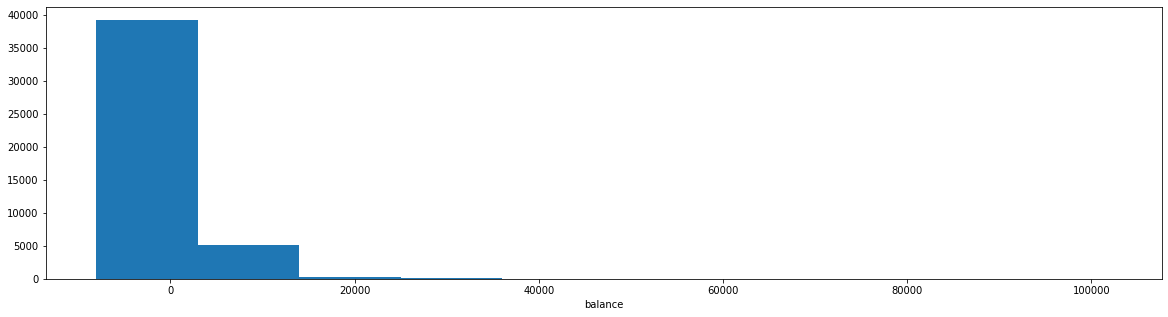

In [ ]:
plt.figure(figsize=(20,5))

plt.hist(df_good_age["balance"])

plt.xlabel("balance")

plt.show()

Observations: 

1.   The balance value ranges from around -5000 to 35000.
2.   Around 40000 members have a salary ranging from -5000 to 2000.
3.   Around 4500 members have a salary ranging from around 2000 to 17000.
4.   Around 500 members have a salary ranging from around 17000 to 22000.
5.   Some members less than 500 have a salary ranging from 2200 to 3500.
   



<ipython-input-54-3735cfef0a7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_age["duration"]=df_good_age["duration"].astype(float)


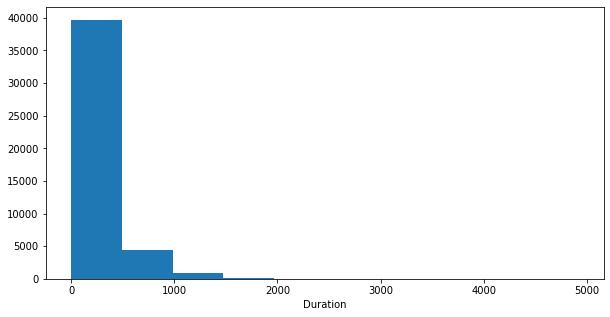

In [ ]:
df_good_age["duration"]=df_good_age["duration"].astype(float)

plt.figure(figsize=(10,5))

plt.hist(df["duration"])

plt.xlabel("Duration")

plt.show()

Observations:

1.   Around 40000 members took the duration time ranging from 0 sec to 400 sec.
2.   Around 4500 took the duration time from 400s to 900s.
3.   Around 500 members spent the time ranging from 900s to 1400s.
4.   Some mebers less than 500 spent the time ranging from 1400s to 1900s.



<ipython-input-55-2c8266a5eee2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_age["salary"]=df_good_age["salary"].astype(float)


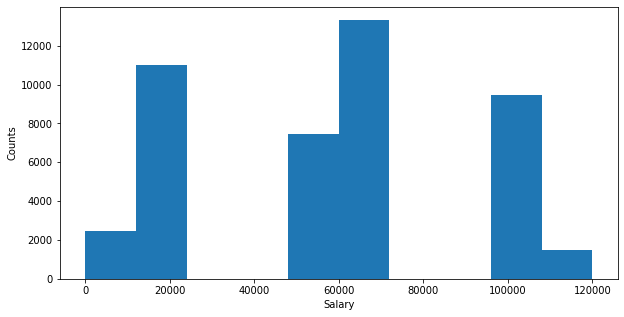

In [ ]:
df_good_age["salary"]=df_good_age["salary"].astype(float)

plt.figure(figsize=(10,5))

plt.hist(df["salary"])

plt.xlabel("Salary")

plt.ylabel("Counts")

plt.show()

Observations:

From the above graph, we can see how the salary is varying among the population.



1.   Around 2400 peope have salary ranging from 0 to 11,000.
2.   Around 11,100 people have salary ranging from 11,000 to 22,000.
3.   Around 7200 people have salary ranging from 49,000 to 61,000.
4.   Around 13,100 people have salary ranging from 61,000 to 71,000.
5.   Around 9300 people have salary ranging from 90,600 to 1,08,000.
6.   Around 1100 people have salary ranging from 1,08,000 to 1,19,900.
                                         



#### Cat:

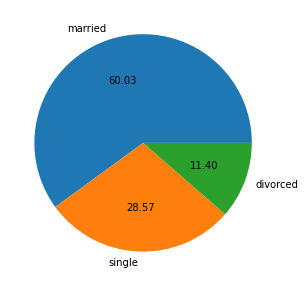

In [ ]:
plt.figure(figsize=(10,5))
df2=df_good_age["marital"].value_counts()
plt.pie(df2,labels=df2.index, autopct='%.2f')
plt.show()

Observations:

We can see the percent of single (28.57), married (60.03) and divorced (11.40) people in the whole population. 

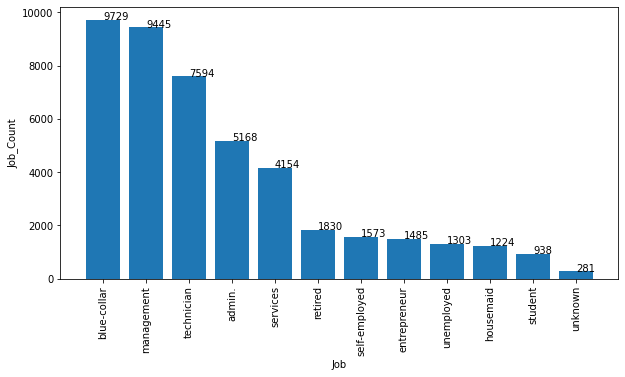

In [ ]:
plt.figure(figsize=(10,5))
df3=df_good_age["job"].value_counts()

plt.xlabel("Job")
plt.ylabel("Job_Count")

plt.xticks(rotation="vertical")

plt.bar(df3.index, df3)


def addlabels(x,y):
  a=len(x.unique())
  for i in range(a):
   plt.text(i,y[i],y[i])


addlabels(df_good_age["job"], df_good_age["job"].value_counts())


plt.show()

Observations:

The count of each category in job is as follows:

Blue-collar: 9729
Management: 9445
Technician: 7594
Admin: 5168
Services: 4154
Retired: 1830
Self Employed: 1573
Enterpreneur: 1485
Unemployed: 1303
Housemaid: 1224
Student: 938
Unknown: 281


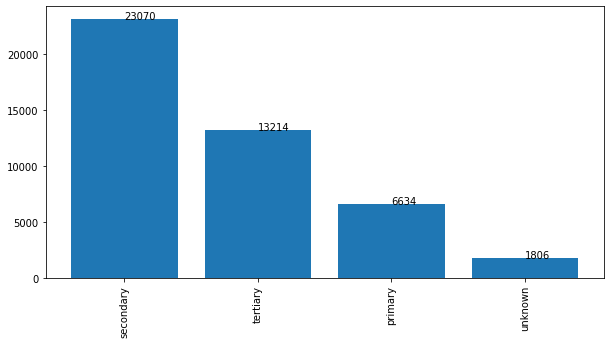

In [ ]:

plt.figure(figsize=(10,5))

df4=df_good_age["edu"].value_counts()

plt.bar(df4.index, df4)

plt.xticks(rotation="vertical")

def addlabels(x,y):
    a=len(df["edu"].unique())
    for i in range(a):
        plt.text(i,y[i],y[i])


addlabels(df_good_age["edu"], df_good_age["edu"].value_counts())


plt.show()

Observations:

The count of each category in education is as follows:

Primary: 6634
Secondary: 23070
Tertiary: 13214
Unknown: 1806

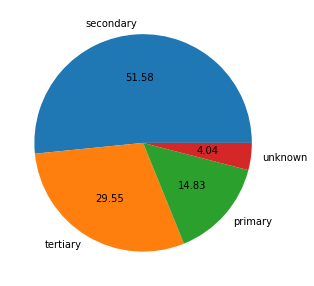

In [ ]:
plt.figure(figsize=(10,5))
df5=df_good_age["edu"].value_counts()
plt.pie(df5,labels=df5.index, autopct='%.2f')
plt.show()

Observations:

We can see the percent of primary (14.83), secondary (51.58), tertiary (29.55) and unknown (4.04) people in the whole population. 

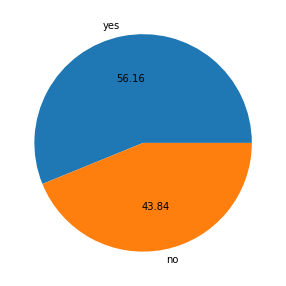

In [ ]:
plt.figure(figsize=(10,5))
df6=df_good_age["housing"].value_counts()
plt.pie(df6,labels=df6.index, autopct='%.2f')
plt.show()

Observations:

We can see the percent of yes (56.16) and no (43.84) responses in the whole population. 

# Bivariate:

*   Discover the relationships between numerical columns using Scatter plots,hexbin plots, pair plots, etc..
*   Identify the patterns between categorical and numerical columns using swarmplot, boxplot, barplot, etc..
*   Mention observations after each plot.






#### Num vs Num

<ipython-input-62-4c62d55d35da>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


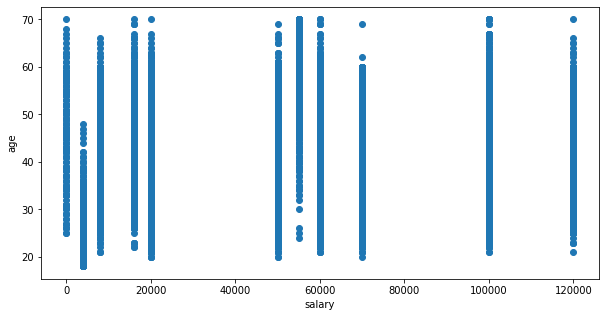

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df_good_age["salary"],df_good_age["age"])

ax=plt.axes()
ax.set_xlabel("salary")
ax.set_ylabel("age")

plt.show()

Observations:

We can see the following observations from the graph:

1.   People of salary ranging from 0 to 2000 belong to the age criteria of 14 - 70 years.
2.   People of salary ranging from 5000 to 7000 belong to the age criteria of 15 - 70 years.
3.   People of salary ranging from 1,00,000 to 1,12,000 belong to the age criteria of 20 - 70 years.



<ipython-input-63-82840f0a70d6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


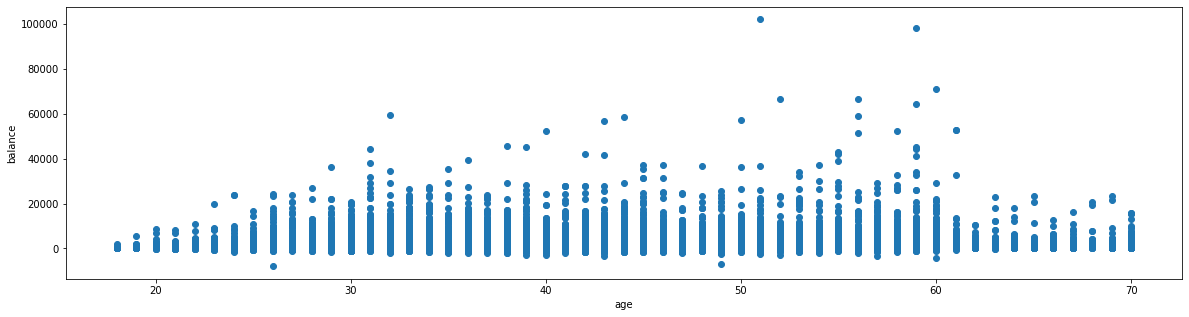

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(df_good_age["age"],df_good_age["balance"])

ax=plt.axes()
ax.set_xlabel("age")
ax.set_ylabel("balance")

plt.show()

Observations:

We can draw an observation from the graph that the maximum balance is around 1,00,000 which belongs to the people in the age criteria of 50 - 60 years.

<ipython-input-64-e4709a316821>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


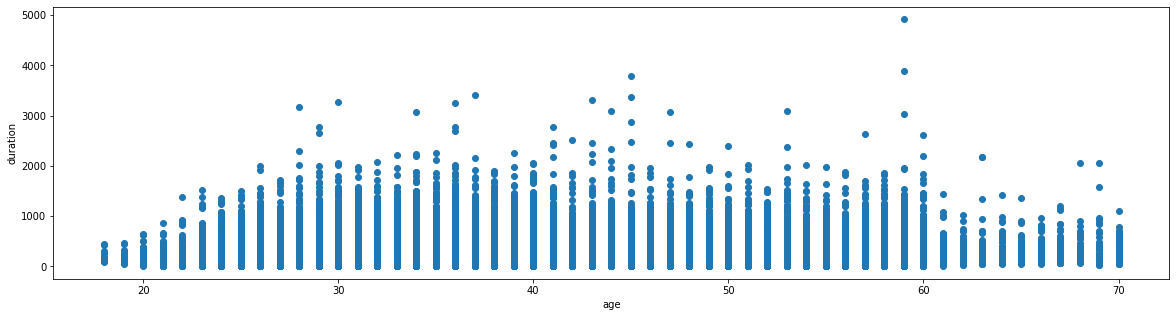

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(df_good_age["age"],df_good_age["duration"])

ax=plt.axes()
ax.set_xlabel("age")
ax.set_ylabel("duration")

plt.show()

Observations:

We can observe that, upto 60 of age, as the age increases, the duration is also increasing. 
After the age of 60 years, as the age is increasing, the duration is decreasing.

Num vs Cat

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


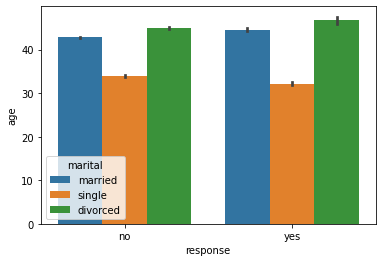

In [ ]:
sns.barplot(df_good_age["response"],df_good_age["age"],hue=df_good_age["marital"])
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


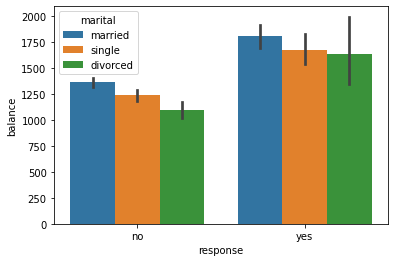

In [ ]:
sns.barplot(df_good_age["response"],df_good_age["balance"],hue=df_good_age["marital"])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


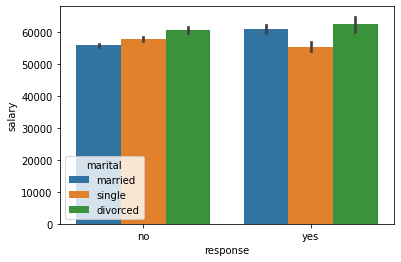

In [ ]:
sns.barplot(df_good_age["response"],df_good_age["salary"],hue=df_good_age["marital"])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


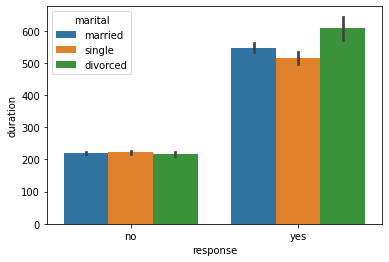

In [ ]:
sns.barplot(df_good_age["response"],df_good_age["duration"],hue=df_good_age["marital"])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


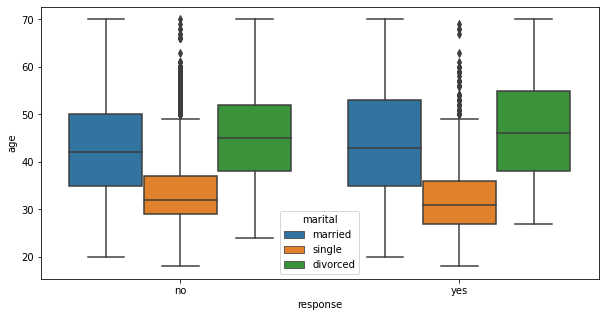

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df_good_age["response"],df_good_age["age"],hue=df_good_age["marital"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


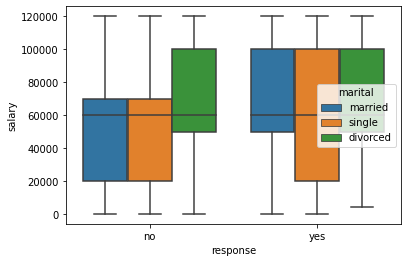

In [ ]:
sns.boxplot(df_good_age["response"],df_good_age["salary"],hue=df_good_age["marital"])
plt.show()

Cat vs Cat

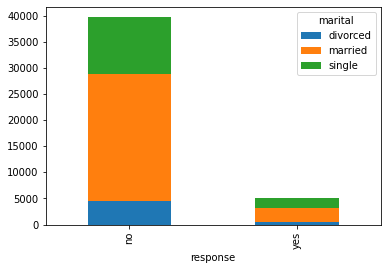

In [ ]:
cros_tab=pd.crosstab(df_good_age["response"],df_good_age["marital"])

cros_tab.plot(kind="bar",stacked=True)

Observations:

We can see the following observations for yes responses:



*   Around 600 people, who were divorced, responded yes.
*   Around 4000 people, who were married responded yes.
*   Around 1500 people, who were single, responded yes.


Among the people who responded no,


*   Around 4500 of them were divorced.
*   Around 25,000 of them were married.
*   Around 10,000 of them were single.







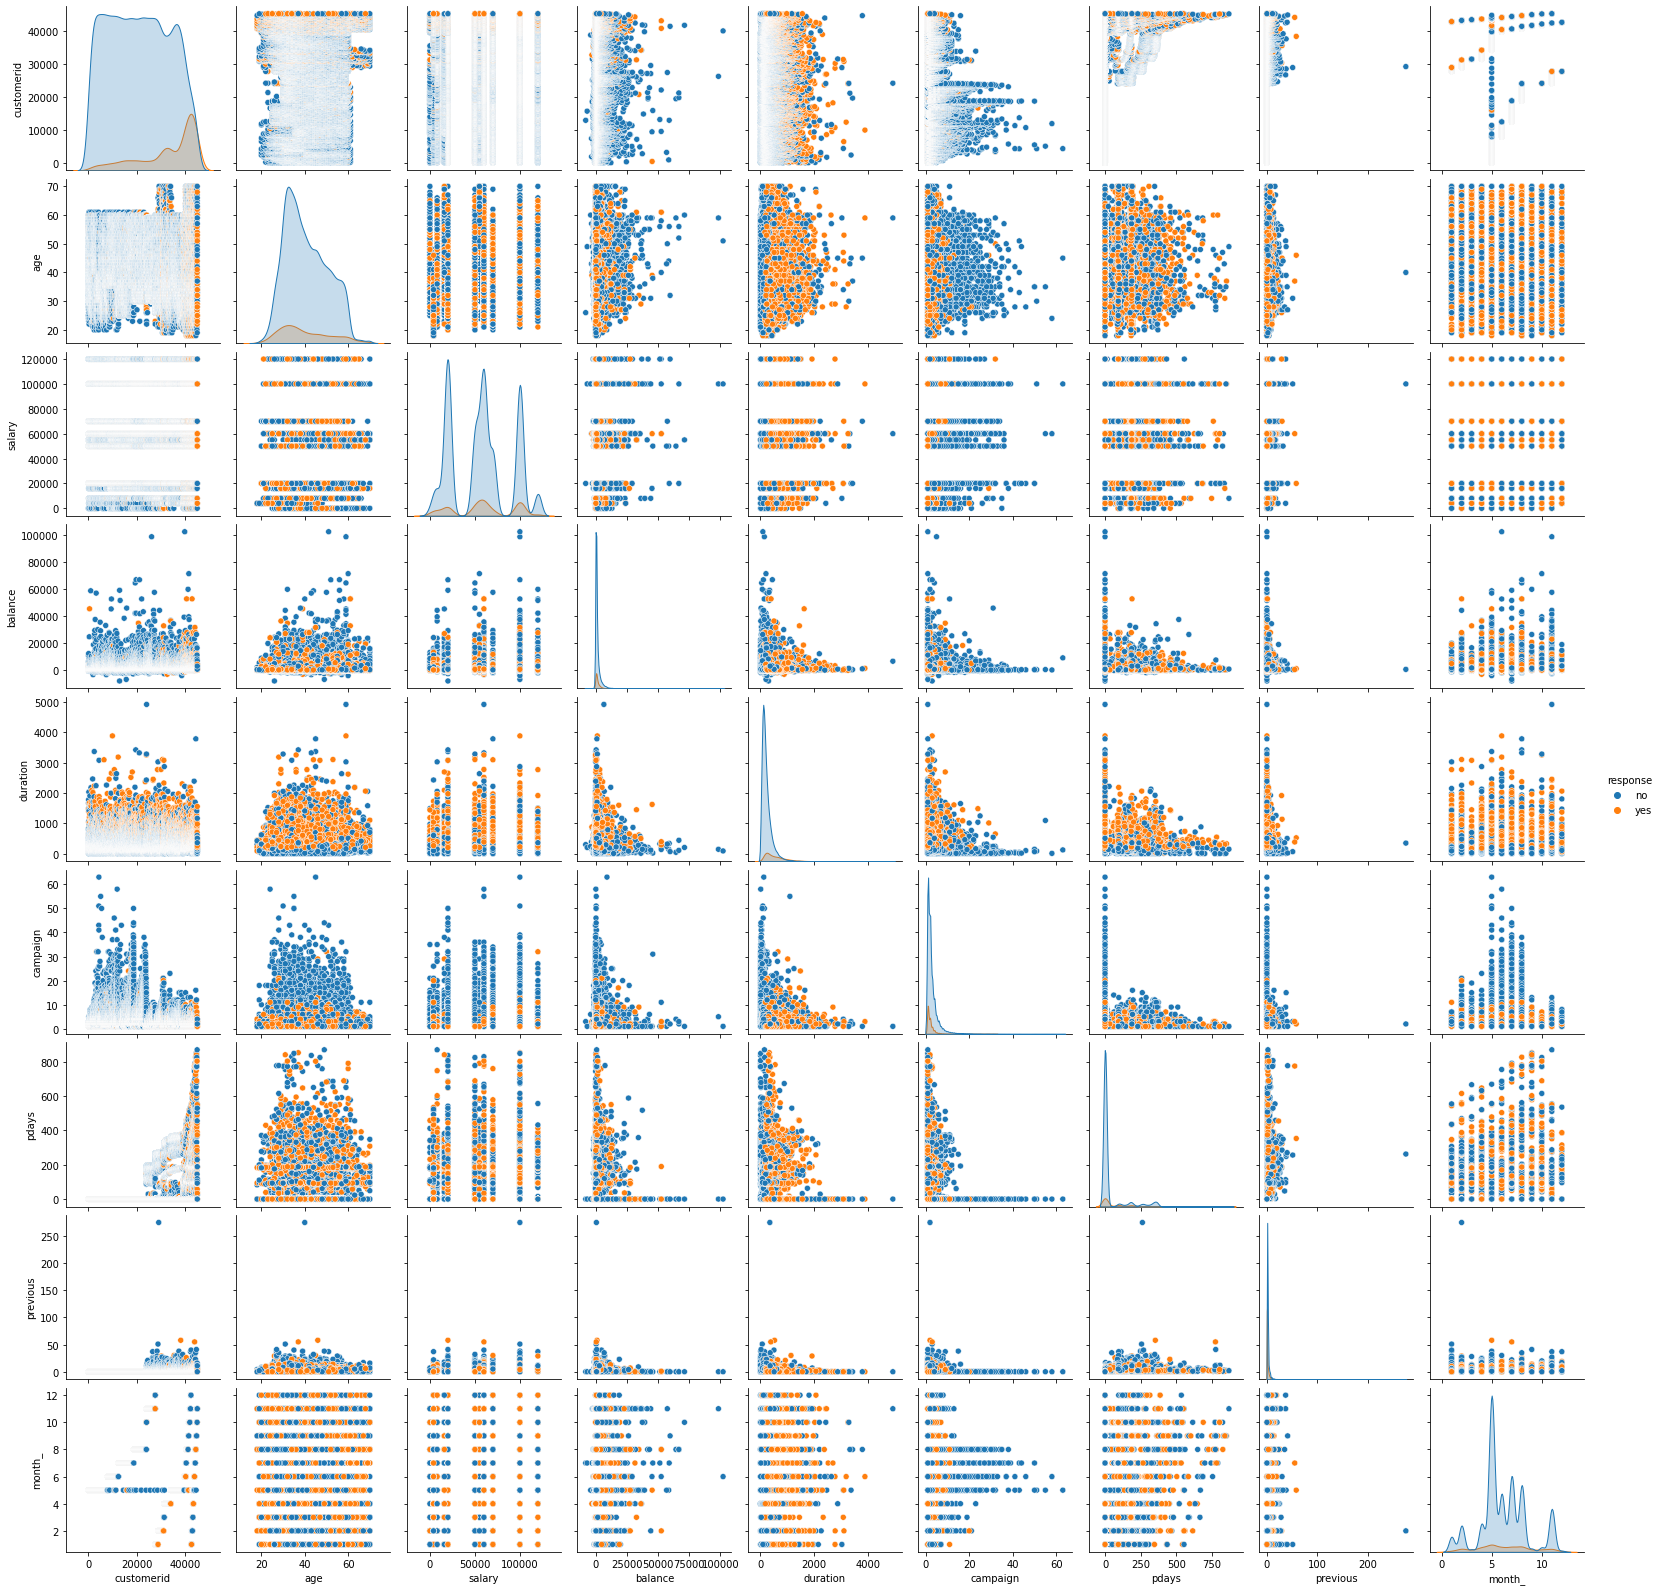

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df_good_age,hue="response")
plt.show()

Observations:

We can observe the pair plot for each column in the graph shown above.

# Statistical Manipulation:

####1.	Find the correlation between the columns and draw the observations from it.

In [ ]:
hm=df_good_age.corr()
hm

1,age,salary,balance,duration
1,,,,
age,1.000000,0.030157,0.086703,-0.016167
salary,0.030157,1.000000,0.057150,-0.010190
balance,0.086703,0.057150,1.000000,0.019195
duration,-0.016167,-0.010190,0.019195,1.000000


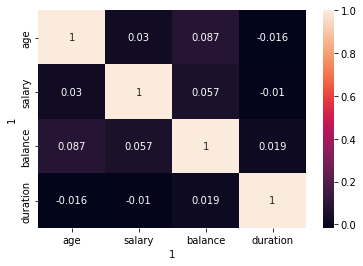

In [ ]:
import seaborn as sns

sns.heatmap(hm,annot=True)

From the above heat map, we can see the following observations:


1.   As the age increases, salary is increasing, i.e, they have a positive correlation.

2.   The duration has a negative correlation with age.

3.   The duration has a negative correlation with salary.

4.   The age has a positive correlation with balance.

5.   The salary has a positive correlation with balance.

6.   The duration has a positive correlation with balance.



####2.	What is the mean age and duration time of the customers with respect to every column?

In [ ]:
df_sal=df_good_age.groupby("salary")["age","duration"].agg(np.mean)
df_sal

<ipython-input-82-466688378be5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sal=df_good_age.groupby("salary")["age","duration"].agg(np.mean)


1,age,duration
salary,,
0.0,46.783784,233.824324
4000.0,26.542644,246.360341
8000.0,40.958557,288.285495
16000.0,45.977941,245.830065
20000.0,40.072333,262.524724
50000.0,39.269737,246.654412
55000.0,57.981421,276.380328
60000.0,39.478128,255.237373
70000.0,38.741695,259.114829


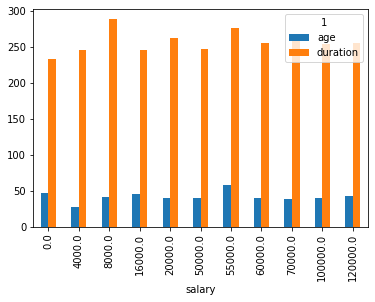

In [ ]:
df_sal.plot(kind="bar")

In [ ]:
df_res=df_good_age.groupby("response").agg({"age":["mean"],"duration":["mean"]})
df_res

1,age,duration
,mean,mean
response,,
no,40.590670,220.624032
yes,40.152101,542.822647


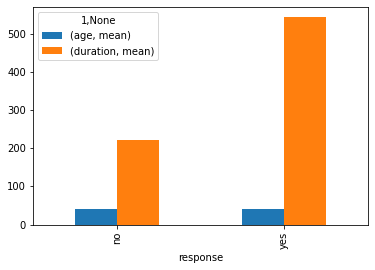

In [ ]:
df_res.plot(kind="bar")

In [ ]:
df_mar=df_good_age.groupby("marital").agg({"age":"mean","duration":"mean"})
df_mar

1,age,duration
marital,,
divorced,45.073558,261.616712
married,42.954112,252.006891
single,33.662310,266.145797


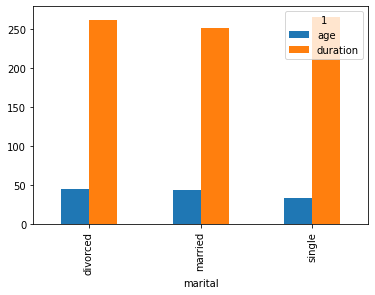

In [ ]:
df_mar.plot(kind="bar")

In [ ]:
df_hou=df_good_age.groupby("housing")["age","duration"].agg([np.mean])
df_hou

<ipython-input-88-b47e2a0a52f6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_hou=df_good_age.groupby("housing")["age","duration"].agg([np.mean])


1,age,duration
,mean,mean
housing,,
no,42.318015,254.607008
yes,39.153874,259.120511


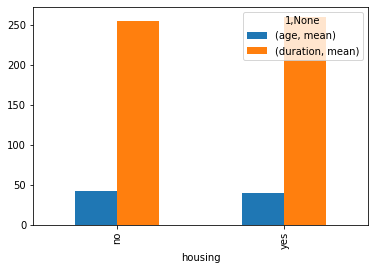

In [ ]:
df_hou.plot(kind="bar")

In [ ]:
df_tar=df_good_age.groupby("targeted")["age","duration"].agg(np.mean)
df_tar

<ipython-input-90-5d4ae81d38d3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_tar=df_good_age.groupby("targeted")["age","duration"].agg(np.mean)


1,age,duration
targeted,,
no,38.036264,263.121709
yes,41.090914,255.828916


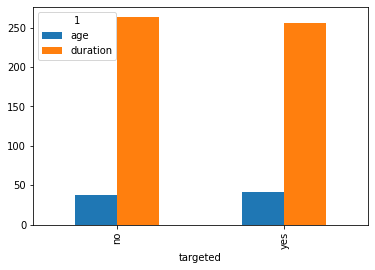

In [ ]:
df_tar.plot(kind="bar")

In [ ]:
df_job=df_good_age.groupby("job").agg({"age":"mean","duration":"mean"})
df_job

1,age,duration
job,,
admin.,39.269737,246.654412
blue-collar,40.028677,262.651866
entrepreneur,42.129293,255.196633
housemaid,45.977941,245.830065
management,40.397459,253.649338
retired,57.981421,276.380328
self-employed,40.344565,267.802924
services,38.741695,259.114829
student,26.542644,246.360341


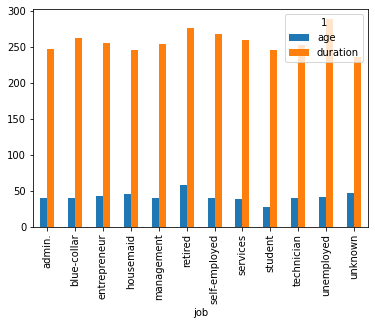

In [ ]:
df_job.plot(kind="bar")

In [ ]:
df_edu=df_good_age.groupby("edu")["age","duration"].agg(np.mean)
df_edu

<ipython-input-94-aa4612a6ef54>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_edu=df_good_age.groupby("edu")["age","duration"].agg(np.mean)


1,age,duration
edu,,
primary,44.817305,253.853030
secondary,39.751756,258.000997
tertiary,39.358029,257.477827
unknown,43.569214,255.790698


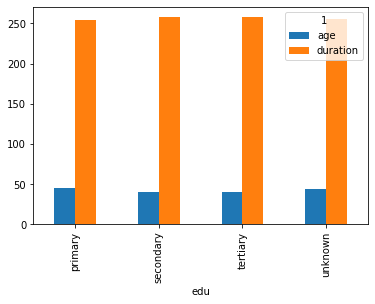

In [ ]:
df_edu.plot(kind="bar")

####3.	Find the mean and median of every column response wise and draw the observations.

In [ ]:
df_res1=df_good_age.groupby("response")["balance"].agg([np.mean,np.median])
df_res1

,mean,median
response,,
no,1295.223578,415.0
yes,1737.442494,704.0


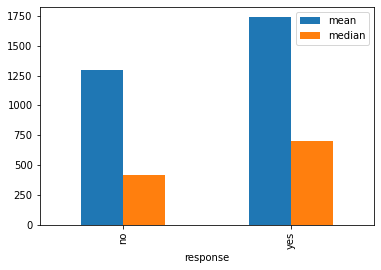

In [ ]:
df_res1.plot(kind="bar")

In [ ]:
df_res2=df_good_age.groupby("response")["salary"].agg([np.mean,np.median])
df_res2

,mean,median
response,,
no,56818.156601,60000.0
yes,58975.340304,60000.0


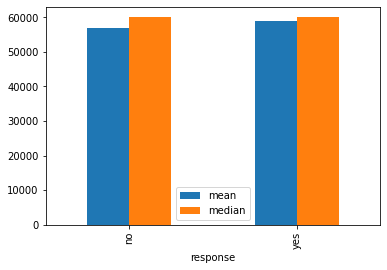

In [ ]:
df_res2.plot(kind="bar")

In [ ]:

df_res3=df_good_age.groupby("response")["age"].agg([np.mean,np.median])
df_res3

,mean,median
response,,
no,40.590670,39.0
yes,40.152101,37.0


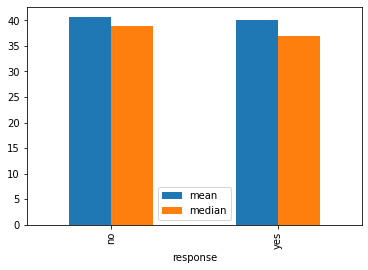

In [ ]:
df_res3.plot(kind="bar")

In [ ]:
df_res4=df_good_age.groupby("response")["balance"].agg([np.mean,np.median])
df_res4

,mean,median
response,,
no,1295.223578,415.0
yes,1737.442494,704.0


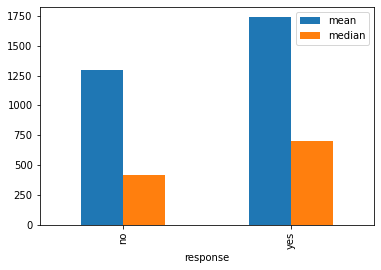

In [ ]:
df_res4.plot(kind="bar")

#### 4.Find the probabilities with respect to the job role and education with customer responses.

1.   Here, we are finding the chances in which responses are yes/no for each 
combination of job role and education.


In [ ]:
df_good_age.groupby(["response","job","edu"])["response"].count()

response  job          edu      
no        admin.       primary       196
                       secondary    3718
                       tertiary      473
                       unknown       152
          blue-collar  primary      3539
                                    ... 
yes       unemployed   unknown         4
          unknown      primary         3
                       secondary       9
                       tertiary        4
                       unknown        16
Name: response, Length: 96, dtype: int64

In [ ]:
df_good_age["res_for_comb"]=df_good_age.groupby(["response","job","edu"])["response"].transform("count")

<ipython-input-111-3ae5e2c825e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_age["res_for_comb"]=df_good_age.groupby(["response","job","edu"])["response"].transform("count")


2.   In the next step, we are finding the total number of yes responses and no responses in the data.



In [ ]:
df_good_age.groupby(["response"])["response"].count()

response
no     39655
yes     5069
Name: response, dtype: int64

In [ ]:
df_good_age["res"]=df_good_age.groupby(["response"])["response"].transform("count")

<ipython-input-113-dd0553c7ebe9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_age["res"]=df_good_age.groupby(["response"])["response"].transform("count")


3. Finally, as given in the question, we are finding:

>If it is given that the response is yes/no, what is the probability that the job role would be x and the education would be y:



In [ ]:
df_good_age["prob"]=df_good_age["res_for_comb"].astype(int)/df_good_age["res"].astype(int)

<ipython-input-114-4676d636dce3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_age["prob"]=df_good_age["res_for_comb"].astype(int)/df_good_age["res"].astype(int)


In [ ]:
df_good_age["prob"].head(10)

0    0.167999
1    0.118800
2    0.012357
3    0.010617
4    0.002673
5    0.167999
6    0.167999
7    0.015963
8    0.012886
9    0.118800
Name: prob, dtype: float64

Let us divide the dataframe into two (so that we can find the max and min probability of each response, wrt job and edu, separately):


1.   One which has yes responses (df_yes)
2.   Another one which has no responses (df_no)


In the next step, we are going to check which row has the max probability if the response is yes.

In [ ]:
df_yes=df_good_age.loc[df_good_age["response"]=="yes"]

a=df_yes["prob"].max() 

df_yes.loc[df_yes["prob"]==a]


1,customerid,age,salary,balance,marital,job,edu,targeted,default,housing,...,pdays,previous,poutcome,response,month_,date,outliers_age,res_for_comb,res,prob
270,271,42.0,100000.0,0.0,single,management,tertiary,no,no,yes,...,-1,0,unknown,yes,5,2017-5-5,None,1133,5069,0.223515
388,389,56.0,100000.0,830.0,married,management,tertiary,yes,no,yes,...,-1,0,unknown,yes,5,2017-5-6,None,1133,5069,0.223515
1124,1125,29.0,100000.0,199.0,married,management,tertiary,yes,no,yes,...,-1,0,unknown,yes,5,2017-5-7,None,1133,5069,0.223515
1193,1194,35.0,100000.0,3837.0,divorced,management,tertiary,no,no,yes,...,-1,0,unknown,yes,5,2017-5-8,None,1133,5069,0.223515
1372,1373,43.0,100000.0,2067.0,single,management,tertiary,no,no,yes,...,-1,0,unknown,yes,5,2017-5-8,None,1133,5069,0.223515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45131,45132,47.0,100000.0,0.0,married,management,tertiary,yes,no,no,...,-1,0,unknown,yes,10,2017-10-27,None,1133,5069,0.223515
45137,45138,30.0,100000.0,297.0,single,management,tertiary,no,no,no,...,-1,0,unknown,yes,11,2017-11-8,None,1133,5069,0.223515
45156,45157,37.0,100000.0,3556.0,married,management,tertiary,yes,no,no,...,-1,0,unknown,yes,11,2017-11-9,None,1133,5069,0.223515
45192,45193,29.0,100000.0,765.0,single,management,tertiary,no,no,no,...,-1,0,unknown,yes,11,2017-11-16,None,1133,5069,0.223515


Here, we are going to check which row has the min probability if the response is yes.

In [ ]:
b=df_yes["prob"].min() 

df_yes.loc[df_yes["prob"]==b]

1,customerid,age,salary,balance,marital,job,edu,targeted,default,housing,...,pdays,previous,poutcome,response,month_,date,outliers_age,res_for_comb,res,prob
3225,3226,43.0,60000.0,3173.0,single,self-employed,unknown,no,no,no,...,-1,0,unknown,yes,5,2017-5-15,None,3,5069,0.000592
3324,3325,49.0,0.0,341.0,married,unknown,primary,yes,no,yes,...,-1,0,unknown,yes,5,2017-5-15,None,3,5069,0.000592
33195,33196,50.0,0.0,341.0,married,unknown,primary,yes,no,yes,...,340,2,success,yes,4,2017-4-20,None,3,5069,0.000592
34316,34317,44.0,60000.0,163.0,married,self-employed,unknown,no,no,yes,...,-1,0,unknown,yes,5,2017-5-4,None,3,5069,0.000592
40204,40205,51.0,60000.0,2094.0,married,self-employed,unknown,no,no,no,...,-1,0,unknown,yes,6,2017-6-8,None,3,5069,0.000592
41994,41995,53.0,0.0,732.0,married,unknown,primary,yes,no,no,...,-1,0,unknown,yes,10,2017-10-27,None,3,5069,0.000592


To find which row has the max probability if the response is no, we can see the following method:

In [ ]:
df_no=df_good_age.loc[df_good_age["response"]=="no"]

c=df_no["prob"].max() 

df_no.loc[df_no["prob"]==c]

1,customerid,age,salary,balance,marital,job,edu,targeted,default,housing,...,pdays,previous,poutcome,response,month_,date,outliers_age,res_for_comb,res,prob
0,1,58.0,100000.0,2143.0,married,management,tertiary,yes,no,yes,...,-1,0,unknown,no,5,2017-5-5,None,6662,39655,0.167999
5,6,35.0,100000.0,231.0,married,management,tertiary,yes,no,yes,...,-1,0,unknown,no,5,2017-5-5,None,6662,39655,0.167999
6,7,28.0,100000.0,447.0,single,management,tertiary,no,no,yes,...,-1,0,unknown,no,5,2017-5-5,None,6662,39655,0.167999
21,22,56.0,100000.0,779.0,married,management,tertiary,yes,no,yes,...,-1,0,unknown,no,5,2017-5-5,None,6662,39655,0.167999
26,27,39.0,100000.0,255.0,single,management,tertiary,no,no,yes,...,-1,0,unknown,no,5,2017-5-5,None,6662,39655,0.167999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45151,45152,47.0,100000.0,311.0,single,management,tertiary,no,no,yes,...,378,2,failure,no,11,2017-11-9,None,6662,39655,0.167999
45161,45162,31.0,100000.0,720.0,married,management,tertiary,yes,no,yes,...,-1,0,unknown,no,11,2017-11-9,None,6662,39655,0.167999
45169,45170,31.0,100000.0,2994.0,married,management,tertiary,yes,no,yes,...,229,2,failure,no,11,2017-11-10,None,6662,39655,0.167999
45194,45195,59.0,100000.0,138.0,married,management,tertiary,yes,no,yes,...,187,5,failure,no,11,2017-11-16,None,6662,39655,0.167999


To find which row has the min probability if the response is no, we can see the following step:

In [ ]:
d=df_no["prob"].min() 

df_no.loc[df_no["prob"]==d]

1,customerid,age,salary,balance,marital,job,edu,targeted,default,housing,...,pdays,previous,poutcome,response,month_,date,outliers_age,res_for_comb,res,prob
217,218,53.0,8000.0,13.0,married,unemployed,unknown,no,no,no,...,-1,0,unknown,no,5,2017-5-5,None,25,39655,0.00063
8591,8592,33.0,8000.0,170.0,single,unemployed,unknown,no,no,yes,...,-1,0,unknown,no,6,2017-6-3,None,25,39655,0.00063
10246,10247,52.0,8000.0,83.0,married,unemployed,unknown,no,no,yes,...,-1,0,unknown,no,6,2017-6-11,None,25,39655,0.00063
11452,11453,36.0,8000.0,1437.0,married,unemployed,unknown,no,no,no,...,-1,0,unknown,no,6,2017-6-19,None,25,39655,0.00063
15536,15537,53.0,8000.0,210.0,married,unemployed,unknown,no,no,yes,...,-1,0,unknown,no,7,2017-7-21,None,25,39655,0.00063
17911,17912,36.0,8000.0,4481.0,single,unemployed,unknown,no,no,no,...,-1,0,unknown,no,7,2017-7-30,None,25,39655,0.00063
18228,18229,35.0,8000.0,144.0,married,unemployed,unknown,no,no,no,...,-1,0,unknown,no,7,2017-7-30,None,25,39655,0.00063
18240,18241,56.0,8000.0,846.0,married,unemployed,unknown,no,no,yes,...,-1,0,unknown,no,7,2017-7-30,None,25,39655,0.00063
24506,24507,42.0,8000.0,970.0,married,unemployed,unknown,no,no,yes,...,119,10,success,no,11,2017-11-17,None,25,39655,0.00063
26320,26321,31.0,8000.0,167.0,single,unemployed,unknown,no,no,no,...,-1,0,unknown,no,11,2017-11-20,None,25,39655,0.00063


Let us find the probability in another perspective:

Given that the job is x and education is y, what is the probability that the response will be yes/no?

In [ ]:
df_good_age.groupby(["job","edu","response"])["response"].count()

job      edu        response
admin.   primary    no           196
                    yes           11
         secondary  no          3718
                    yes          501
         tertiary   no           473
                                ... 
unknown  secondary  yes            9
         tertiary   no            33
                    yes            4
         unknown    no           106
                    yes           16
Name: response, Length: 96, dtype: int64

In [ ]:
df_good_age["res_for_comb"]=df_good_age.groupby(["job","edu","response"])["response"].transform("count")

<ipython-input-124-379f7bb47e56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_age["res_for_comb"]=df_good_age.groupby(["job","edu","response"])["response"].transform("count")


In [ ]:
df_good_age.groupby(["job","edu"])["edu"].count()

job            edu      
admin.         primary       207
               secondary    4219
               tertiary      572
               unknown       170
blue-collar    primary      3757
               secondary    5369
               tertiary      149
               unknown       454
entrepreneur   primary       183
               secondary     541
               tertiary      685
               unknown        76
housemaid      primary       614
               secondary     393
               tertiary      173
               unknown        44
management     primary       293
               secondary    1119
               tertiary     7795
               unknown       238
retired        primary       595
               secondary     861
               tertiary      292
               unknown        82
self-employed  primary       130
               secondary     576
               tertiary      831
               unknown        36
services       primary       345
               sec

In [ ]:
df_good_age["comb"]=df_good_age.groupby(["job","edu"])["edu"].transform("count")

<ipython-input-126-1061b288ae2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_age["comb"]=df_good_age.groupby(["job","edu"])["edu"].transform("count")


The probabilty is given by:

In [ ]:
df_good_age["prob2"]=df_good_age["res_for_comb"].astype(int)/df_good_age["comb"].astype(int)

<ipython-input-127-5ce11d54bf12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_age["prob2"]=df_good_age["res_for_comb"].astype(int)/df_good_age["comb"].astype(int)


In [ ]:
df_good_age.head()

1,customerid,age,salary,balance,marital,job,edu,targeted,default,housing,...,poutcome,response,month_,date,outliers_age,res_for_comb,res,prob,comb,prob2
0,1,58.0,100000.0,2143.0,married,management,tertiary,yes,no,yes,...,unknown,no,5,2017-5-5,None,6662,39655,0.167999,7795,0.854650
1,2,44.0,60000.0,29.0,single,technician,secondary,yes,no,yes,...,unknown,no,5,2017-5-5,None,4711,39655,0.118800,5228,0.901109
2,3,33.0,120000.0,2.0,married,entrepreneur,secondary,yes,no,yes,...,unknown,no,5,2017-5-5,None,490,39655,0.012357,541,0.905730
3,4,47.0,20000.0,1506.0,married,blue-collar,unknown,no,no,yes,...,unknown,no,5,2017-5-5,None,421,39655,0.010617,454,0.927313
4,5,33.0,0.0,1.0,single,unknown,unknown,no,no,no,...,unknown,no,5,2017-5-5,None,106,39655,0.002673,122,0.868852


####5.	Find the Best features using correlation and Chi-square test.

In [ ]:
correl=df_good_age.corr()

In [ ]:
correl

1,age,salary,balance,duration,res_for_comb,res,prob,comb,prob2
1,,,,,,,,,
age,1.000000,0.030157,0.086703,-0.016167,-0.117303,0.013934,-0.135274,-0.136750,0.019573
salary,0.030157,1.000000,0.057150,-0.010190,0.219107,-0.021244,0.306882,0.315000,-0.052958
balance,0.086703,0.057150,1.000000,0.019195,-0.011497,-0.046992,0.015513,0.013297,-0.054506
duration,-0.016167,-0.010190,0.019195,1.000000,-0.166591,-0.396771,-0.002854,-0.004479,-0.395509
res_for_comb,-0.117303,0.219107,-0.011497,-0.166591,1.000000,0.409690,0.828800,0.867955,0.410341
res,0.013934,-0.021244,-0.046992,-0.396771,0.409690,1.000000,-0.026696,0.005206,0.984371
prob,-0.135274,0.306882,0.015513,-0.002854,0.828800,-0.026696,1.000000,0.985400,-0.019427
comb,-0.136750,0.315000,0.013297,-0.004479,0.867955,0.005206,0.985400,1.000000,0.000080
prob2,0.019573,-0.052958,-0.054506,-0.395509,0.410341,0.984371,-0.019427,0.000080,1.000000


Null Hypothesis (Ho): Job and response are independent on each other.
Confidence Interval: 0.95

In [ ]:
cont=pd.crosstab(df_good_age["job"],df_good_age["response"])
cont

response,no,yes
job,,
admin.,4539,629
blue-collar,9021,708
entrepreneur,1363,122
housemaid,1120,104
management,8149,1296
retired,1512,318
self-employed,1391,182
services,3785,369
student,669,269


In [ ]:
from scipy.stats import chi2_contingency as c2
cscore, p, dof, exp = c2(cont)

In [ ]:
cscore


636.0901947548911

In [ ]:
p

2.650211656641711e-129

In [ ]:
dof

11

In [ ]:
exp

Hence, pvalue < 0.05.
The values are present in the rejection region of the chisquare graph.
So, we can conclude that we fail to reject the null hypothesis. i.e., the values job and response are dependent on each other.

Null Hypothesis (Ho): Education and response are independent on each other.
Confidence Interval: 0.95

In [ ]:
cont1=pd.crosstab(df_good_age["edu"],df_good_age["response"])
cont1

response,no,yes
edu,,
primary,6143,491
secondary,20680,2390
tertiary,11256,1958
unknown,1576,230


In [ ]:
from scipy.stats import chi2_contingency as c2
cscore1, p1, dof1, exp1 = c2(cont1)

In [ ]:
cscore1

286.9893836950572

In [ ]:
p1

6.5076707437478655e-62

In [ ]:
dof1

3

In [ ]:
exp1

Hence, pvalue < 0.05.
The values are present in the rejection region of the chisquare graph.
So, we can conclude that we fail to reject the null hypothesis. i.e., the values education and response are dependent on each other.

Null Hypothesis (Ho): Marital status and response are independent on each other.
Confidence Interval: 0.95

In [ ]:
cont2=pd.crosstab(df_good_age["marital"],df_good_age["response"])
cont2

response,no,yes
marital,,
divorced,4526,572
married,24259,2589
single,10870,1908


In [ ]:
from scipy.stats import chi2_contingency as c2
cscore2, p2, dof2, exp2 = c2(cont2)

In [ ]:
cscore2

241.04242429678857

In [ ]:
p2

4.553052013484509e-53

In [ ]:
dof2

2

In [ ]:
exp2

Hence, pvalue < 0.05.
The values are present in the rejection region of the chisquare graph.
So, we can conclude that we fail to reject the null hypothesis. i.e., the values marital status and response are dependent on each other.

Null Hypothesis (Ho): Housing loan status and response are independent on each other.
Confidence Interval: 0.95

In [ ]:
cont3=pd.crosstab(df_good_age["housing"],df_good_age["response"])
cont3

response,no,yes
housing,,
no,16461,3145
yes,23194,1924


In [ ]:
from scipy.stats import chi2_contingency as c2
cscore3, p3, dof3, exp3 = c2(cont3)

In [ ]:
cscore3

768.8333793034378

In [ ]:
p3

3.224139539250508e-169

In [ ]:
dof3

1

In [ ]:
exp3

Hence, pvalue < 0.05.
The values are present in the rejection region of the chisquare graph.
So, we can conclude that we fail to reject the null hypothesis. i.e., the values housing loan status and response are dependent on each other.

Null Hypothesis (Ho): Duration and response are independent on each other.
Confidence Interval: 0.95

In [ ]:
cont4=pd.crosstab(df_good_age["duration"],df_good_age["response"])
cont4

response,no,yes
duration,,
0.0,3,0
1.0,4,0
2.0,1,0
3.0,4,0
4.0,46,0
...,...,...
3366.0,1,0
3421.0,1,0
3784.0,1,0


In [ ]:
from scipy.stats import chi2_contingency as c2
cscore4, p4, dof4, exp4 = c2(cont4)

In [ ]:
cscore4

10712.072055247178

In [ ]:
p4

0.0

In [ ]:
dof4

1499

In [ ]:
exp4

Hence, pvalue < 0.05.
The values are present in the rejection region of the chisquare graph.
So, we can conclude that we fail to reject the null hypothesis. i.e., the values duration and response are dependent on each other.

####6. Find the relation of salary and age column using statistical tests  and draw the observation from it.

In [ ]:
cv=df_good_age["salary"].corr(df_good_age["age"])
print(cv)

0.030156956303869796


In [ ]:
cont5=pd.crosstab(df_good_age["age"],df_good_age["salary"])
cont5

In [ ]:
from scipy.stats import chi2_contingency as c2
cscore5, p5, dof5, exp5 = c2(cont5)

In [ ]:
print(cscore5)

23933.92598041551


In [ ]:
p5

0.0

In [ ]:
dof5

520

In [ ]:
exp5

The correlation is greater than 1 (0.025), p value < 0.05.
We can conclude that age and salary are dependent on each other and they have a positive correlation.

####7.	Using statistical analysis, find whether the age column is impacting the duration column or not.

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df_good_age["age"], df_good_age["duration"])
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: -0.016


In [ ]:
cont6=pd.crosstab(df_good_age["age"],df_good_age["duration"])
cont6

In [ ]:
from scipy.stats import chi2_contingency as c2
cscore6, p6, dof6, exp6 = c2(cont6)

In [ ]:
cscore6

76004.84017354796

In [ ]:
p6

0.9999996497687541

In [ ]:
dof6

77948

In [ ]:
exp6

The correlation is lesser than 1 (-0.021), p value > 0.05.
We can conclude that age and salary are independent as the p value is greater than 0.05 and the cscore falls in the (fail to reject) region.

####8.	Show that the columns are following the Normal Distribution or not, if not following try to convert it non-normal to normal. (use transformation techniques)
# Normality Checks:

In [ ]:
s=np.random.normal(loc=5,scale=0.3,size =(1000))

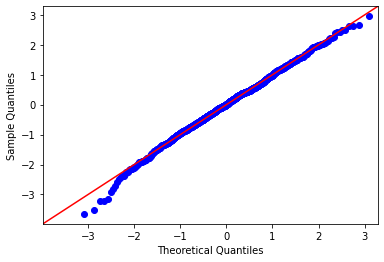

In [ ]:
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
qqplot(s, stats.norm,fit=True,line="45")
plt.show()

Age Column:

<ipython-input-179-c8186e12c0c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_age["age"]=df_good_age["age"].astype(int)


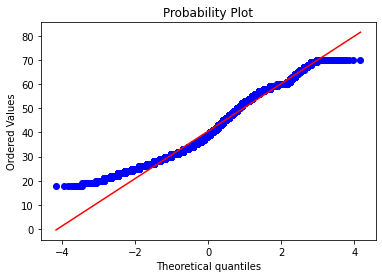

In [ ]:
from scipy import stats

df_good_age["age"]=df_good_age["age"].astype(int)
x=df_good_age["age"]

stats.probplot(x,plot=plt)
plt.show()

Converting age to log of age:

In [ ]:
df_good_age["age_log"]=np.log(df_good_age["age"])

<ipython-input-180-76bcc1f4b6b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_age["age_log"]=np.log(df_good_age["age"])


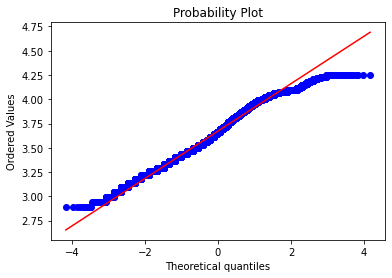

In [ ]:
from scipy import stats

stats.probplot(df_good_age["age_log"],plot=plt)
plt.show()

Balance Column:

In [ ]:
y=df_good_age["balance"].astype(int)

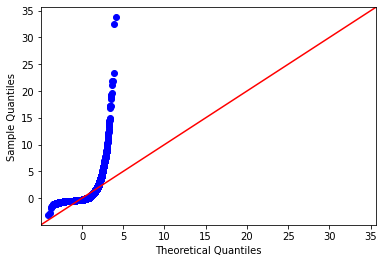

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(y, stats.norm,fit=True,line="45")
plt.show()

Log of balance column:

In [ ]:
df_good_bal["balance"].value_counts()

 0.0       3473
 1.0        193
 2.0        154
 4.0        139
 3.0        133
           ... 
 2922.0       1
-1598.0       1
 3238.0       1
-1099.0       1
 1719.0       1
Name: balance, Length: 4119, dtype: int64

Since there are negative values in the balance column, we can't convert it into logarithmic values.

Salary Column:

In [ ]:
z=df_good_age["salary"].astype(float)

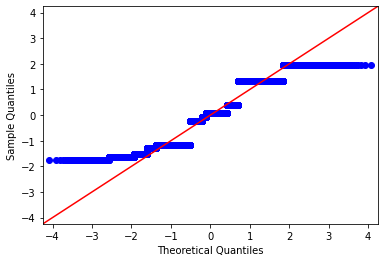

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
qqplot(z, stats.norm,fit=True,line="45")
plt.show()

Log of salary:

In [ ]:
df_good_age["salary"].value_counts()

20000.0     9788
100000.0    9445
60000.0     9167
50000.0     5168
70000.0     4154
55000.0     1830
120000.0    1485
8000.0      1303
16000.0     1224
4000.0       938
0.0          222
Name: salary, dtype: int64

In [ ]:
df_good_age["salary_"]=df_good_age["salary"].replace(0,0.1)

<ipython-input-189-ce2b685a337b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_age["salary_"]=df_good_age["salary"].replace(0,0.1)


In [ ]:

df_good_age["sal_log"]=np.log(df_good_age["salary_"])


<ipython-input-190-c3bb01b3ce8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_age["sal_log"]=np.log(df_good_age["salary_"])


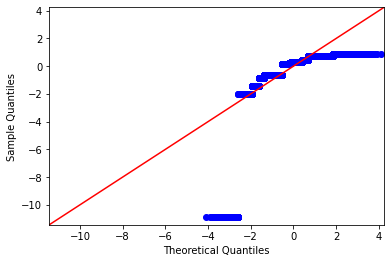

In [ ]:
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
qqplot(df_good_age["sal_log"], stats.norm,fit=True,line="45")
plt.show()

Duration:

In [ ]:
a=df_good_age["duration"].astype(float)

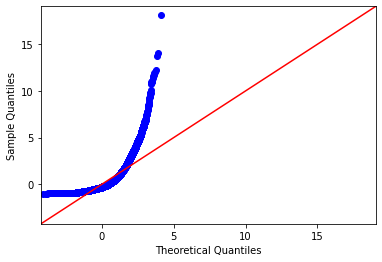

In [ ]:
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
qqplot(a, stats.norm,fit=True,line="45")
plt.show()

Log of duration:

In [ ]:
print("printing row index with zero values ")
df_good_age.astype(str)
r = df_good_age.index[df_good_age["duration"]==0]
print(r)

printing row index with zero values 
Int64Index([6424, 22937, 36425], dtype='int64')


In [ ]:
df_good_age=df_good_age.replace(df_good_age["duration"][6424],0.1)
df_good_age=df_good_age.replace(df_good_age["duration"][22937],0.1)
df_good_age=df_good_age.replace(df_good_age["duration"][36425],0.1)

In [ ]:
df_good_age["dur_log"]=np.log(df_good_age["duration"])

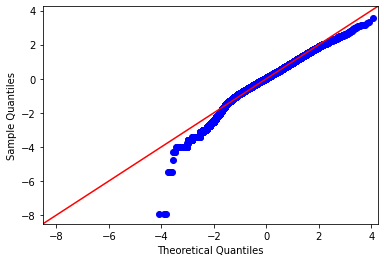

In [ ]:
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

qqplot(df_good_age["dur_log"], stats.norm,fit=True,line="45")

plt.show()

Let us try to check the normality of the whole dataset together:

((array([-1.77709673, -1.33087857, -1.05345661, -0.83977496, -0.6589352 ,
         -0.49749478, -0.34812942, -0.20618578, -0.06829777,  0.06829777,
          0.20618578,  0.34812942,  0.49749478,  0.6589352 ,  0.83977496,
          1.05345661,  1.33087857,  1.77709673]),
  array([-1.00000000e+00,  8.92447358e-02,  1.00000000e-01,  8.81251481e-01,
          2.00000000e+00,  3.66356165e+00,  5.18738581e+00,  6.00000000e+00,
          1.10020998e+01,  3.90000000e+01,  1.79000000e+02,  4.42000000e+02,
          3.53900000e+03,  4.21900000e+03,  2.23625000e+04,  3.96550000e+04,
          6.00000000e+04,  6.00000000e+04])),
 (16575.487428810553, 10581.301307972799, 0.7567090037822032))

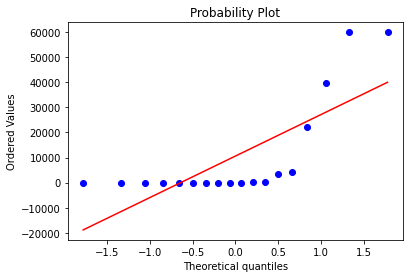

In [ ]:
stats.probplot(df_good_age.quantile(), dist="norm", plot=plt)

Normality check after converting the whole dataset into logarithmic values:

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


((array([-1.77709673, -1.33087857, -1.05345661, -0.83977496, -0.6589352 ,
       -0.49749478, -0.34812942, -0.20618578, -0.06829777,  0.06829777,
        0.20618578,  0.34812942,  0.49749478,  0.6589352 ,  0.83977496,
        1.05345661,  1.33087857,  1.77709673]), array([-2.41637284, -2.30258509, -0.12641224,  0.69314718,  1.2984358 ,
        1.64622987,  1.79175947,  2.39808615,  3.66356165,  5.18738581,
        6.09130988,  8.17159948,  8.34735341, 10.01514073, 10.58797232,
       11.00209984, 11.00209984,         nan])), (nan, nan, nan))


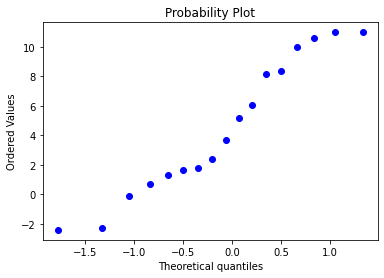

In [ ]:
stats.probplot(np.log(df_good_age.quantile()), dist="norm", plot=plt)